In [1]:
import my_models

This notebook will loop through the following steps: 
1. The model and the initial results
2. Changes I make for the current (newer) model, and a short comment on why
3. results of the current newer model
4. Return to step 2

For reference: 

- Untrained model accuracy: 34.72, 
- Tri-class classification means we expect ~33.33%
- Untrained model (weighted) f1: 51.55

### Iteration 1

In [2]:
my_models.conv_net_1()

conv_net_1(
  (c1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(16, 6, kernel_size=(3, 3), stride=(1, 1))
  (mp3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=96, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=3, bias=True)
  (activation): ReLU()
)

1. Loss: CrossEntropyLoss
2. Optimiser: Adam (with default params)
3. batch_size: 16


In [3]:
# model = conv_net()
# epochs = 16
# criterion = nn.CrossEntropyLoss()

Results:
- Trained model accuracy: 77.08%
- Trained model (weighted) f1: 78.0

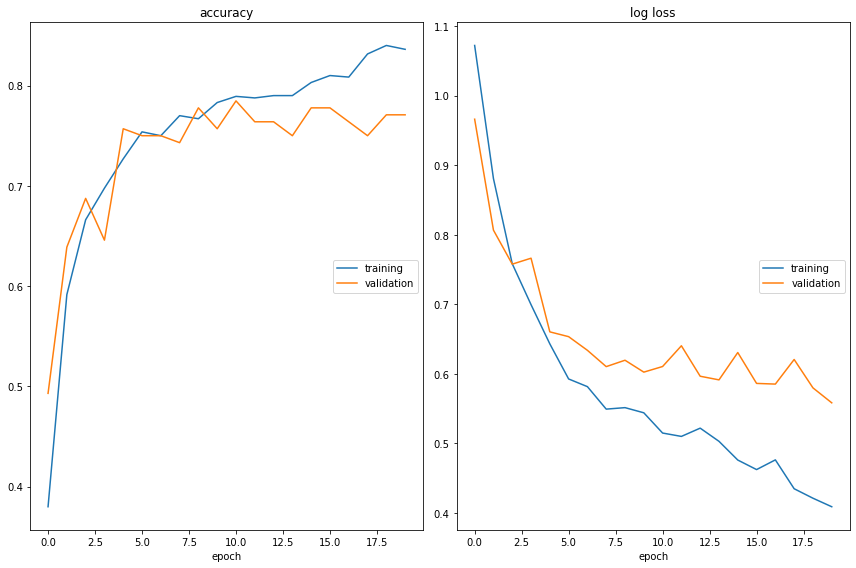

This is my initial model. I haven't made any changes.

### Iteration 1.1

In [4]:
my_models.conv_net_2()

conv_net_2(
  (c1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(16, 20, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (c4): Conv2d(20, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (c5): Conv2d(16, 6, kernel_size=(3, 3), stride=(1, 1))
  (mp5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bia

I tried to make the model deeper by adding more convolutional and dense layers, but that made accuracy and f1 much worse, so I went back to my initial model.

- Trained model accuracy: 72.22%
- Trained model (weighted) f1: 73.0

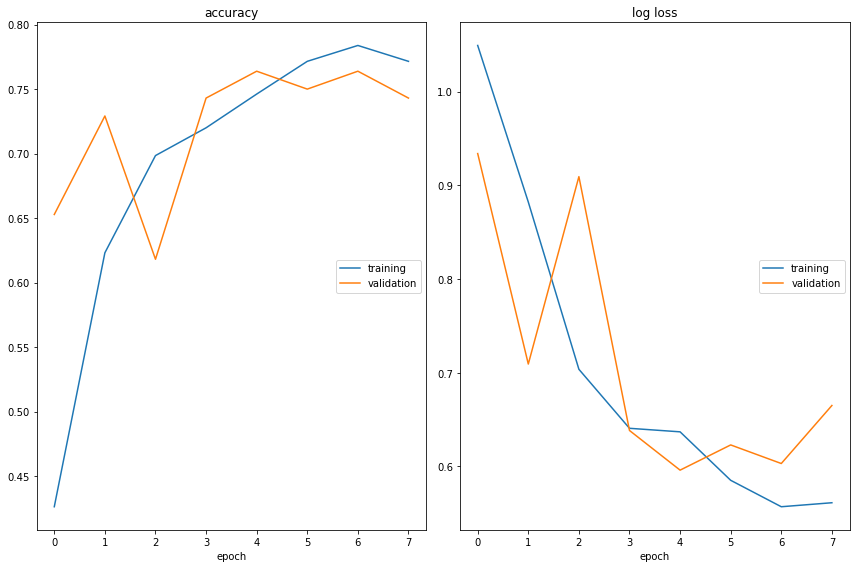

### Iteration 2

In [5]:
# lr=1e-3
# epochs = 8
# optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# criterion = nn.CrossEntropyLoss()


After the first iteration, I realised I was applying train transforms to the test and validation data. I debugged the issue in my code and removed transforms. This led to the same results in half the number of epochs. The model also overfit sooner than the earlier version.

Results:
- Trained model accuracy: 77.08%
- Trained model (weighted) f1: 77.0

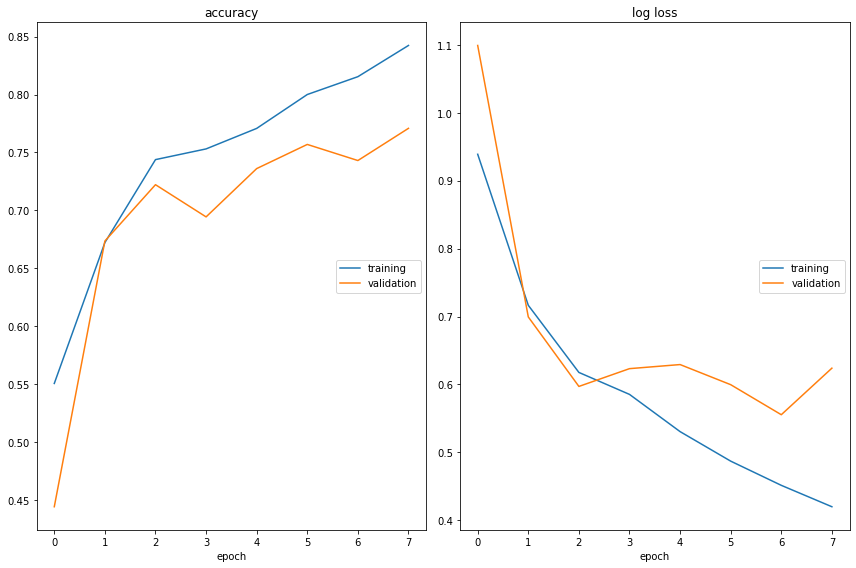

### iteration 3


Past 8 epochs, accuracy and f1 score would plummet. So in order to improve my model's generalisability I added random transforms. 

When applying techniques that improve the model's ability to generalise (i.e. regularisation techniques), the model's training improvement will slow down, but for the same number of epochs, there will be less overfitting. To balance this, you add more epochs. I added 4 more epochs.

epochs = 12

results:
- Trained model accuracy: 79.86%
- Trained model (weighted) f1: 81.0

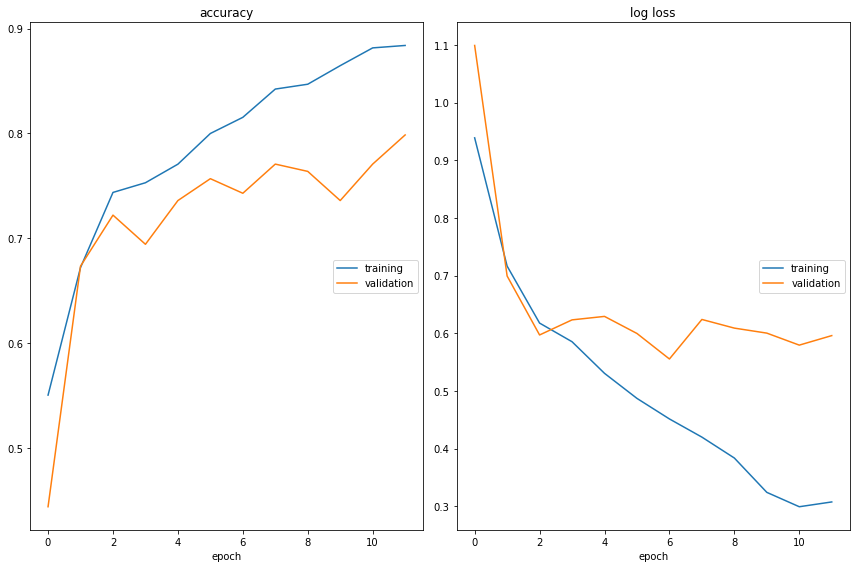

### iteration 4

In [6]:
my_models.conv_net_3()

conv_net_3(
  (c1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(16, 6, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=600, out_features=864, bias=True)
  (fc2): Linear(in_features=864, out_features=216, bias=True)
  (output): Linear(in_features=216, out_features=3, bias=True)
  (activation): Tanh()
  (dropout_1): Dropout(p=0.2, inplace=False)
  (dropout_2): Dropout(p=0.05, inplace=False)
)

I wanted to capture more of the complexity of the data, so I made my model wider. Since the model has more trainable parameters, it will need more epochs (30) to train. I also added dropout to balance the larger model.

Even though it looks like my model is overfitting, less epochs resulted in worse results on my validation set.

Results:
- Trained model accuracy: 85.42%
- Trained model (weighted) f1: 86.0

I also changed my activation to Tanh. With this architecture, leaky ReLU (which does better than ReLU) only scores:
- Trained model accuracy: 81.94%
- Trained model (weighted) f1: 82.0

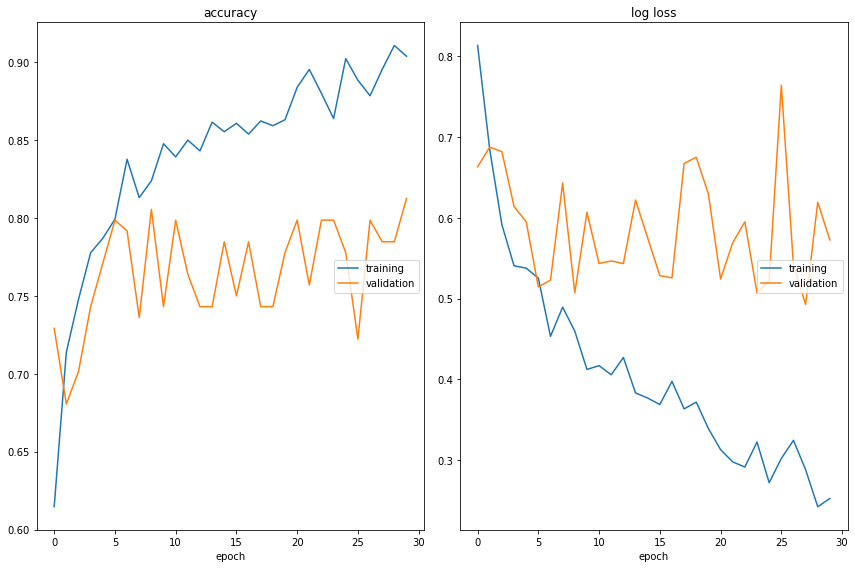

### Iteration 4.1

In [7]:
my_models.conv_net_4()

conv_net_4(
  (c1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(8, 24, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(24, 8, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (mp3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=1254, bias=True)
  (fc2): Linear(in_features=1254, out_features=422, bias=True)
  (output): Linear(in_features=422, out_features=3, bias=True)
  (activation): Tanh()
  (dropout_1): Dropout(p=0.25, inplace=False)
  (dropout_2): Dropout(p=0.075, inplace=False)
)

I tried making the model wider by increasing the number of channels in my convolutional layers, and then increasing the number of nodes in my dense layers (As well as increasing dropout and epochs for the same reasons as previously) but no matter what I did, I couldnt improve performance

Results:
- Trained model accuracy: 79.86%
- Trained model (weighted) f1: 80.0